In [2]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.linear_model import LinearRegression

In [3]:
#load daatset (taken from understat)
df = pd.read_csv('/Users/calvi/Downloads/Prem_Week_24.csv')

In [4]:
df.head()

,Unnamed: 0,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS
0,1,Liverpool,24,16,6,2,55,23,54,55.20+0.20,30.16+7.16,46.37-7.63
1,2,Manchester City,23,16,4,3,56,25,52,50.89-5.11,22.29-2.71,49.47-2.53
2,3,Arsenal,24,16,4,4,53,22,52,52.32-0.68,21.37-0.63,49.86-2.14
3,4,Tottenham,24,14,5,5,51,36,47,45.39-5.61,43.93+7.93,35.48-11.52
4,5,Aston Villa,24,14,4,6,50,32,46,46.95-3.05,36.15+4.15,41.26-4.74


In [5]:
#clearing everything uneccessary for xGA xG after +- using re
def clean_numeric(s):
    return re.sub(r'([+-]?\d+\.\d+)([+-]?\d+\.\d+)?(?=[+-]|\b)', lambda x: x.group(1), s)
columns_to_clean = ['xG', 'xGA','xPTS']
df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.map(clean_numeric))
print(df)

    Unnamed: 0                     Team   M   W  D   L   G  GA  PTS     xG  \
0            1                Liverpool  24  16  6   2  55  23   54  55.20   
1            2          Manchester City  23  16  4   3  56  25   52  50.89   
2            3                  Arsenal  24  16  4   4  53  22   52  52.32   
3            4                Tottenham  24  14  5   5  51  36   47  45.39   
4            5              Aston Villa  24  14  4   6  50  32   46  46.95   
5            6        Manchester United  24  13  2   9  33  33   41  36.86   
6            7         Newcastle United  24  11  3  10  51  39   36  51.06   
7            8                 West Ham  24  10  6   8  36  42   36  34.52   
8            9                 Brighton  24   9  8   7  43  40   35  42.46   
9           10                  Chelsea  24  10  4  10  41  40   34  48.11   
10          11  Wolverhampton Wanderers  24   9  5  10  37  39   32  35.52   
11          12                   Fulham  24   8  5  11  33  39  

In [6]:
# Convert columns to numeric types
df["xG"] = pd.to_numeric(df["xG"], errors='coerce')
df["xGA"] = pd.to_numeric(df["xGA"], errors='coerce')
df["G"] = pd.to_numeric(df["G"], errors='coerce')
df["GA"] = pd.to_numeric(df["GA"], errors='coerce')

In [7]:
df.head()

,Unnamed: 0,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS
0,1,Liverpool,24,16,6,2,55,23,54,55.20,30.16,46.37
1,2,Manchester City,23,16,4,3,56,25,52,50.89,22.29,49.47
2,3,Arsenal,24,16,4,4,53,22,52,52.32,21.37,49.86
3,4,Tottenham,24,14,5,5,51,36,47,45.39,43.93,35.48
4,5,Aston Villa,24,14,4,6,50,32,46,46.95,36.15,41.26


In [8]:
#make new column for diff between expected and actual goals/ goals against.
df['xG_Diff'] = df['xG'] - df['G']
df['xGA_Diff'] = df['xGA'] - df['GA']

In [9]:
#get GD and xGD
df['GD'] = df['G']-df['GA']
df['xGD'] = df['xG']-df['xGA']

In [10]:
#we only need a few columns so we can drop everything else
df = df.drop(['Unnamed: 0', 'M', 'W', 'D', 'L'], axis=1)

In [11]:
#gonna add team badges for plot readability then we can start plotting as well as changing some names so logo appears
df['Team'] = df['Team'].replace('Luton', 'luton town')
df['Team'] = df['Team'].replace('sheffield utd','Sheffield United')
df['badge'] = df['Team'].apply(
    lambda x: f"/Users/calvi/Downloads/football-logos-master/logos/GB1/{x.lower().replace('é', 'e').replace('á', 'a').replace('í', 'i')}.png"
)
df

,Team,G,GA,PTS,xG,xGA,xPTS,xG_Diff,xGA_Diff,GD,xGD,badge
0,Liverpool,55,23,54,55.20,30.16,46.37,0.20,7.16,32,25.04,/Users/calvi/Downloads/football-logos-master/l...
1,Manchester City,56,25,52,50.89,22.29,49.47,-5.11,-2.71,31,28.60,/Users/calvi/Downloads/football-logos-master/l...
2,Arsenal,53,22,52,52.32,21.37,49.86,-0.68,-0.63,31,30.95,/Users/calvi/Downloads/football-logos-master/l...
3,Tottenham,51,36,47,45.39,43.93,35.48,-5.61,7.93,15,1.46,/Users/calvi/Downloads/football-logos-master/l...
4,Aston Villa,50,32,46,46.95,36.15,41.26,-3.05,4.15,18,10.80,/Users/calvi/Downloads/football-logos-master/l...
5,Manchester United,33,33,41,36.86,42.98,29.24,3.86,9.98,0,-6.12,/Users/calvi/Downloads/football-logos-master/l...
6,Newcastle United,51,39,36,51.06,41.56,39.68,0.06,2.56,12,9.50,/Users/calvi/Downloads/football-logos-master/l...
7,West Ham,36,42,36,34.52,45.20,28.21,-1.48,3.20,-6,-10.68,/Users/calvi/Downloads/football-logos-master/l...
8,Brighton,43,40,35,42.46,38.90,35.73,-0.54,-1.10,3,3.56,/Users/calvi/Downloads/football-logos-master/l...
9,Chelsea,41,40,34,48.11,38.14,40.00,7.11,-1.86,1,9.97,/Users/calvi/Downloads/football-logos-master/l...


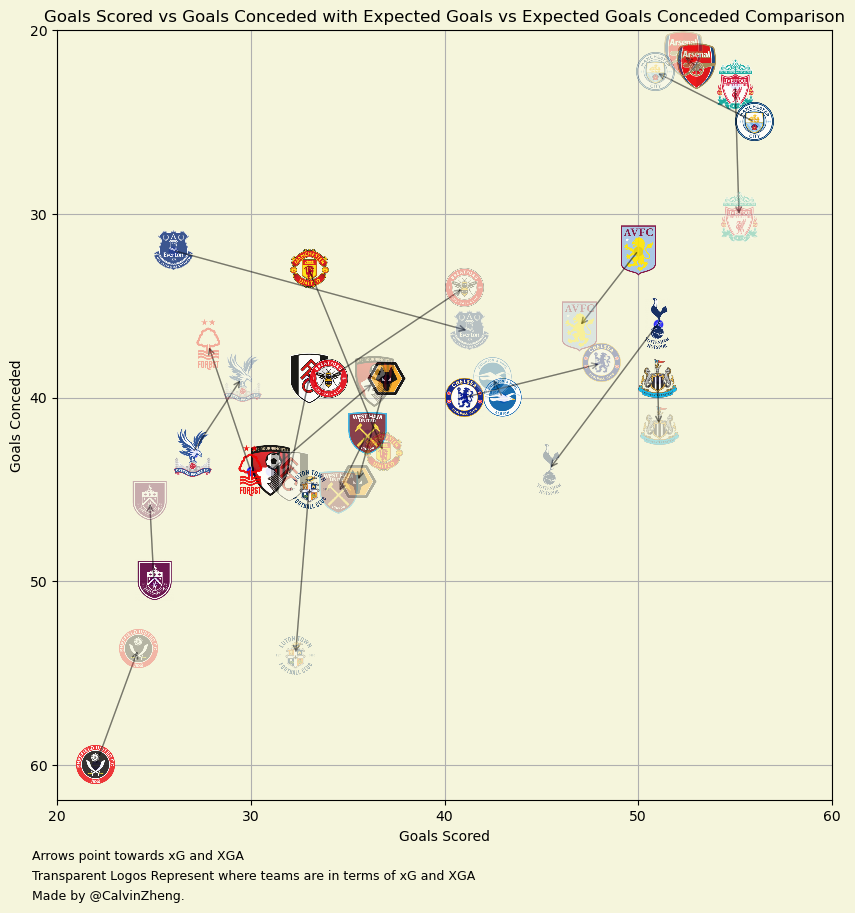

In [16]:
import matplotlib.pyplot as plt
import matplotlib.offsetbox as offsetbox
import pandas as pd

# Assuming df is your DataFrame containing 'G', 'GA', 'badge', 'xG', and 'xGA' columns

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 10))

# Set the background color
fig.set_facecolor('#F5F5DC')
ax.patch.set_facecolor('#F5F5DC')

# Scatter plot with transparency
ax.scatter(df['G'], df['GA'], color='blue', alpha=0.7, label='Actual Goals')  # Adjust alpha value here

# Add team badges or logos before the arrows
for i, badge_path in enumerate(df['badge']):
    img = plt.imread(badge_path)
    alpha = 0.9  # Alpha value for badges before the arrows
    imagebox = offsetbox.OffsetImage(img, zoom=0.2, alpha=alpha)  # Adjust the zoom factor to make logos smaller
    ab = offsetbox.AnnotationBbox(imagebox, (df['G'][i], df['GA'][i]), frameon=False)
    ax.add_artist(ab)

# Define arrow colors based on conditions
arrow_colors = ['green' if xg > g else 'red' for xg, g in zip(df['xG'], df['G'])]
arrow_colors_y = ['green' if xga < ga else 'red' for xga, ga in zip(df['xGA'], df['GA'])]

# Add arrows from each point towards xG and xGA with different colors
for i, (color, color_y) in enumerate(zip(arrow_colors, arrow_colors_y)):
    ax.annotate('', xy=(df['xG'][i], df['xGA'][i]), xytext=(df['G'][i], df['GA'][i]),
                 arrowprops=dict(arrowstyle='->', linestyle='-', lw=1, alpha=0.3), alpha=0.7)
    ax.annotate('', xy=(df['xG'][i], df['xGA'][i]), xytext=(df['G'][i], df['GA'][i]),
                 arrowprops=dict(arrowstyle='->', linestyle='-', lw=1, alpha=0.3), alpha=0.7)

# Add team badges or logos after the arrows
for i, badge_path in enumerate(df['badge']):
    img = plt.imread(badge_path)
    alpha = 0.3  # Alpha value for badges after the arrows
    imagebox = offsetbox.OffsetImage(img, zoom=0.2, alpha=alpha)  # Adjust the zoom factor to make logos smaller
    ab = offsetbox.AnnotationBbox(imagebox, (df['xG'][i], df['xGA'][i]), frameon=False)
    ax.add_artist(ab)

# Add labels and title
ax.set_xlabel('Goals Scored')
ax.set_ylabel('Goals Conceded')
ax.set_title('Goals Scored vs Goals Conceded with Expected Goals vs Expected Goals Conceded Comparison')

# Add legend and footnotes
plt.figtext(0.1, 0.05, 'Arrows point towards xG and XGA', horizontalalignment='left', fontsize=9)
plt.figtext(.1,.03, 'Transparent Logos Represent where teams are in terms of xG and XGA', horizontalalignment='left', fontsize=9)
plt.figtext(0.1, 0.01, 'Made by @CalvinZheng.', horizontalalignment='left', fontsize=9)

ax.set_xticks([20, 30, 40, 50, 60])
ax.set_yticks([20, 30, 40, 50, 60])

# Invert the y-axis
ax.invert_yaxis()

# Show plot
plt.grid(True)
plt.show()

In [153]:
df

,Team,G,GA,PTS,xG,xGA,xPTS,xG_Diff,xGA_Diff,badge,GD,xGD,GD_xGD
0,Liverpool,55,23,54,55.20,30.16,46.37,0.20,7.16,/Users/calvi/Downloads/football-logos-master/l...,32,25.04,6.96
1,Manchester City,56,25,52,50.89,22.29,49.47,-5.11,-2.71,/Users/calvi/Downloads/football-logos-master/l...,31,28.60,2.40
2,Arsenal,53,22,52,52.32,21.37,49.86,-0.68,-0.63,/Users/calvi/Downloads/football-logos-master/l...,31,30.95,0.05
3,Tottenham,51,36,47,45.39,43.93,35.48,-5.61,7.93,/Users/calvi/Downloads/football-logos-master/l...,15,1.46,13.54
4,Aston Villa,50,32,46,46.95,36.15,41.26,-3.05,4.15,/Users/calvi/Downloads/football-logos-master/l...,18,10.80,7.20
5,Manchester United,33,33,41,36.86,42.98,29.24,3.86,9.98,/Users/calvi/Downloads/football-logos-master/l...,0,-6.12,6.12
6,Newcastle United,51,39,36,51.06,41.56,39.68,0.06,2.56,/Users/calvi/Downloads/football-logos-master/l...,12,9.50,2.50
7,West Ham,36,42,36,34.52,45.20,28.21,-1.48,3.20,/Users/calvi/Downloads/football-logos-master/l...,-6,-10.68,4.68
8,Brighton,43,40,35,42.46,38.90,35.73,-0.54,-1.10,/Users/calvi/Downloads/football-logos-master/l...,3,3.56,-0.56
9,Chelsea,41,40,34,48.11,38.14,40.00,7.11,-1.86,/Users/calvi/Downloads/football-logos-master/l...,1,9.97,-8.97
